<h2>Part 1-a</h2>
1 - Import employee file only the gender,salarly grade and dept columns

In [92]:
import pandas as pd
employee_df = pd.read_csv(r"emp_file_CAPSTONE.txt")
df = employee_df
df = df.drop(columns = ['fn', 'ln', 'mi', 'hiredate', 'termdate'])
df





,gender,sg,salary,dept
0,F,1,$77582,hr
1,M,1,38136,comp
2,M,4,107483,fin
3,M,7,3X429110,comp
4,M,7,3X646818,proj
...,...,...,...,...
673,M,6,3X499553,acc
674,M,4,114045,hr
675,M,1,33030,comp
676,M,2,51120,proj


2 - Fix the column dept capitalize it

In [93]:
df['dept'] = df['dept'].str.upper()
df

,gender,sg,salary,dept
0,F,1,$77582,HR
1,M,1,38136,COMP
2,M,4,107483,FIN
3,M,7,3X429110,COMP
4,M,7,3X646818,PROJ
...,...,...,...,...
673,M,6,3X499553,ACC
674,M,4,114045,HR
675,M,1,33030,COMP
676,M,2,51120,PROJ


3 - Create a dataframe for every salary grade (index) with columns 'Male' and 'Female'

In [94]:

gender_groups = df.groupby(['sg', 'gender'])

# create a dataframe for each salary grade with columns 'Male' and 'Female'
sg_df = gender_groups.size().unstack(fill_value=0)

# rename columns
sg_df.rename(columns={'F':'Female','M':'Male'},inplace=True)

print(sg_df)


gender  Female  Male
sg                  
1           22    65
2           26    68
3           32    70
4           22    81
5           34    54
6           34    58
7           31    81


4 - Create pie charts for every Salary Grade with the ratio of men to women

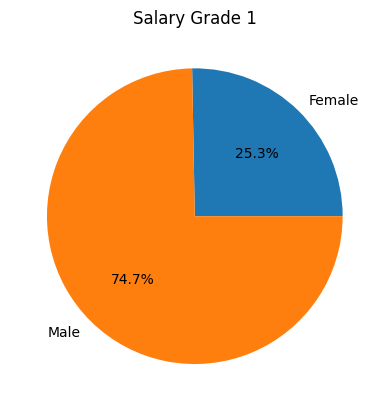

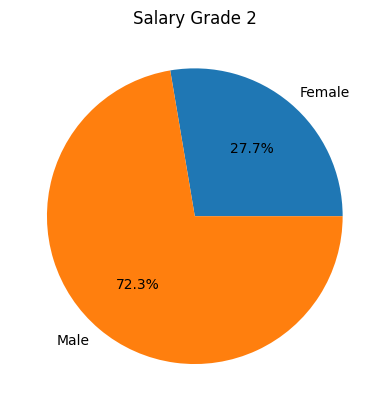

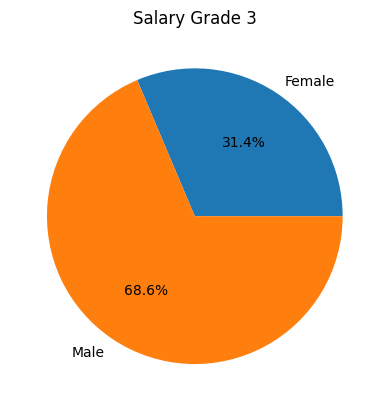

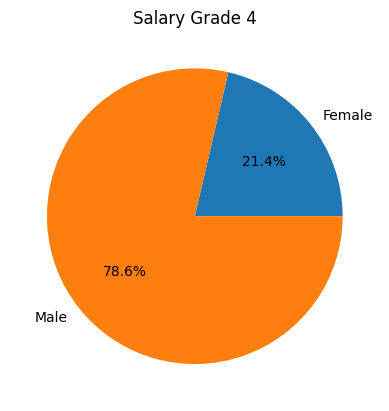

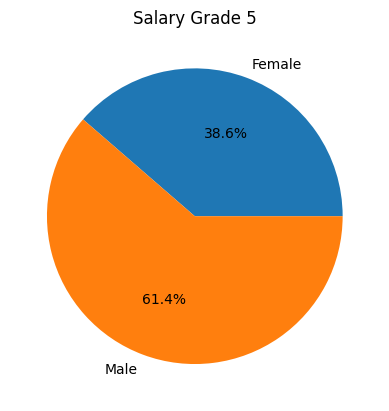

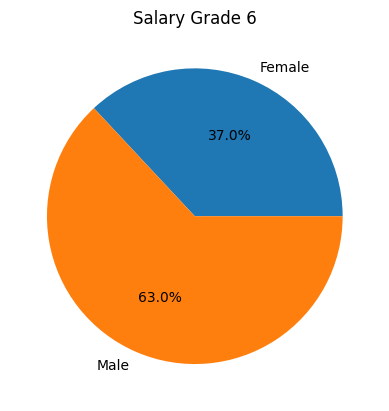

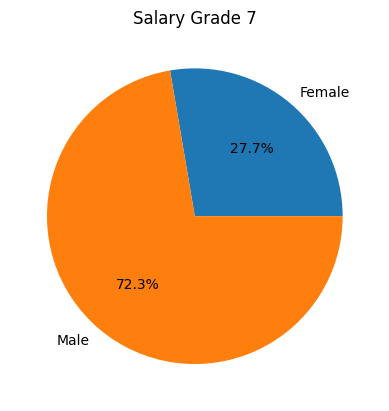

In [95]:
import matplotlib.pyplot as plt


for grade in sg_df.index:

    data = sg_df.loc[grade,:]
 
    plt.pie(data, labels=data.index,autopct='%1.1f%%')
    plt.title(f'Salary Grade {grade}')
 
    plt.show()


5 - Create a dataframe for every Dept (index) with columns 'Male' and 'Female'

In [96]:
# group the data by department and gender
dept_gender_groups = df.groupby(['dept', 'gender'])

# create a dataframe for each department with columns 'Male' and 'Female'
dept_df = dept_gender_groups.size().unstack(fill_value=0)

# rename columns
dept_df.rename(columns={'F':'Female','M':'Male'},inplace=True)
print(dept_df)


gender  Female  Male
dept                
ACC         28    60
COMP        31    73
FIN         31    67
HR          29    67
I.T.        29    84
PROJ        21    65
PUB         32    61


6 - Create pie charts for every Dept with the ratio of men to women

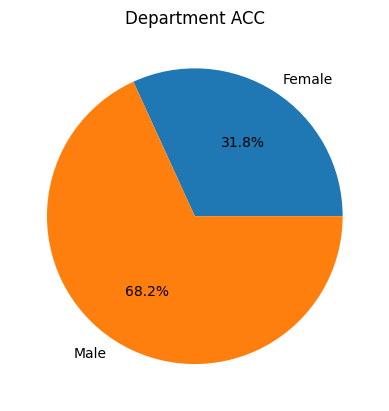

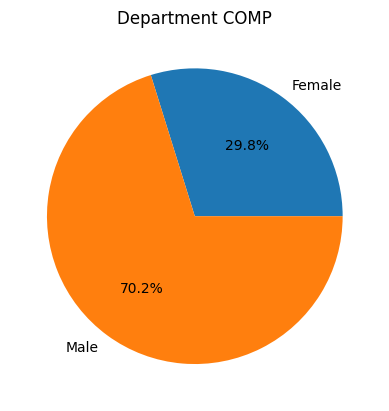

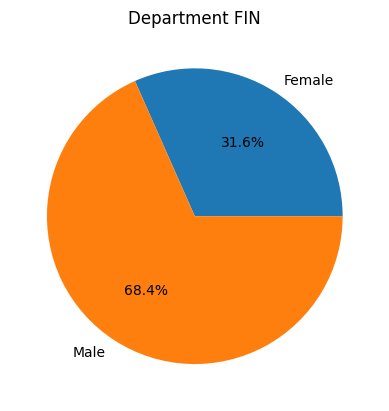

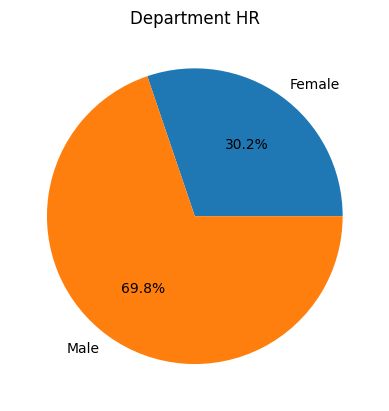

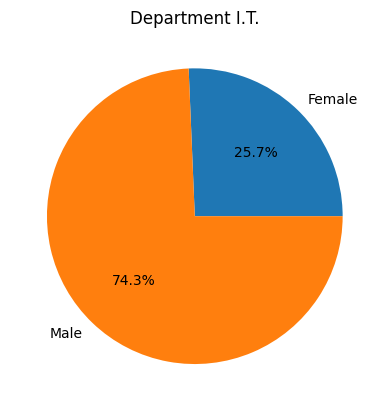

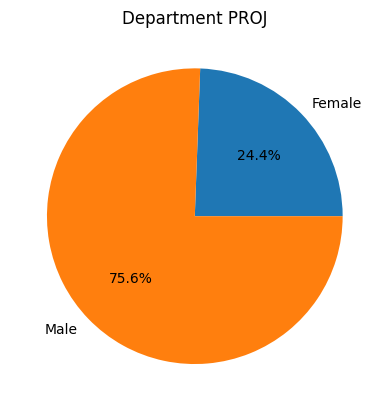

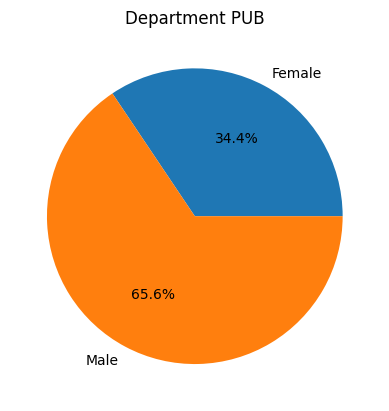

In [97]:
import matplotlib.pyplot as plt

for dept in dept_df.index:
    #extract the slice of data for specific department
    data = dept_df.loc[dept,:]
    # Create a pie chart for the data
    plt.pie(data, labels=data.index,autopct='%1.1f%%')
    plt.title(f'Department {dept}')
    
    plt.show()


<h2>Part 1-b</h2>
1 - Import employee file all columns

In [98]:
import pandas as pd
employee_df = pd.read_csv(r"emp_file_CAPSTONE.txt")
df = employee_df
df

,fn,ln,mi,gender,sg,salary,dept,hiredate,termdate
0,Madison,WILTON,W,F,1,$77582,hr,11/22/2015,
1,James,SMITH,A,M,1,38136,comp,1/17/2018,
2,John,JOHNSON,NaN,M,4,107483,fin,6/2/2017,
3,Robert,WILLIAMS,W,M,7,3X429110,comp,11/25/2013,
4,Michael,BROWN,J,M,7,3X646818,proj,1/20/2012,
...,...,...,...,...,...,...,...,...,...
673,Lawrence,RUBIO,NaN,M,6,3X499553,acc,11/14/2011,
674,Austin,CHOI,NaN,M,4,114045,hr,6/10/2017,
675,Joe,HUFFMAN,G,M,1,33030,comp,3/22/2016,
676,Noah,BOYER,F,M,2,51120,proj,10/8/2017,


2 - Fix the case on the last name

In [99]:
df['ln'] = df['ln'].str.title()
df

,fn,ln,mi,gender,sg,salary,dept,hiredate,termdate
0,Madison,Wilton,W,F,1,$77582,hr,11/22/2015,
1,James,Smith,A,M,1,38136,comp,1/17/2018,
2,John,Johnson,NaN,M,4,107483,fin,6/2/2017,
3,Robert,Williams,W,M,7,3X429110,comp,11/25/2013,
4,Michael,Brown,J,M,7,3X646818,proj,1/20/2012,
...,...,...,...,...,...,...,...,...,...
673,Lawrence,Rubio,NaN,M,6,3X499553,acc,11/14/2011,
674,Austin,Choi,NaN,M,4,114045,hr,6/10/2017,
675,Joe,Huffman,G,M,1,33030,comp,3/22/2016,
676,Noah,Boyer,F,M,2,51120,proj,10/8/2017,


3 - Create a field call Name which has the lastname, First name MI

In [100]:
df['Name'] = df['ln'].str.strip() + ', ' + df['fn'].str.strip() + ' ' + df['mi'].str.strip()
df

,fn,ln,mi,gender,sg,salary,dept,hiredate,termdate,Name
0,Madison,Wilton,W,F,1,$77582,hr,11/22/2015,,"Wilton, Madison W"
1,James,Smith,A,M,1,38136,comp,1/17/2018,,"Smith, James A"
2,John,Johnson,NaN,M,4,107483,fin,6/2/2017,,NaN
3,Robert,Williams,W,M,7,3X429110,comp,11/25/2013,,"Williams, Robert W"
4,Michael,Brown,J,M,7,3X646818,proj,1/20/2012,,"Brown, Michael J"
...,...,...,...,...,...,...,...,...,...,...
673,Lawrence,Rubio,NaN,M,6,3X499553,acc,11/14/2011,,NaN
674,Austin,Choi,NaN,M,4,114045,hr,6/10/2017,,NaN
675,Joe,Huffman,G,M,1,33030,comp,3/22/2016,,"Huffman, Joe G"
676,Noah,Boyer,F,M,2,51120,proj,10/8/2017,,"Boyer, Noah F"


4 - Create a alphabetic list of employees by last name, first name (Name)

In [101]:
df.sort_values(by=['Name'], ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,fn,ln,mi,gender,sg,salary,dept,hiredate,termdate,Name
0,Keith,Acevedo,A,M,6,3X406173,hr,5/6/2007,,"Acevedo, Keith A"
1,Shirley,Aguilar,J,F,3,79150,fin,8/9/2016,,"Aguilar, Shirley J"
2,Kimberly,Alexander,F,F,7,3X532531,pub,3/3/2005,,"Alexander, Kimberly F"
3,Patrick,Allison,G,M,6,3X427516,proj,5/30/2008,,"Allison, Patrick G"
4,Logan,Alvarez,G,M,3,70253,I.T.,11/4/2015,,"Alvarez, Logan G"
...,...,...,...,...,...,...,...,...,...,...
673,Henry,Dalton,NaN,M,5,129990,fin,4/26/2016,,NaN
674,Arthur,Glenn,NaN,M,7,3X561896,proj,9/4/2004,11/12/2017,NaN
675,Sean,Shields,NaN,M,6,3X408951,pub,2/21/2011,,NaN
676,Lawrence,Rubio,NaN,M,6,3X499553,acc,11/14/2011,,NaN


5 - Create a alphabetic list of employees by last name, first name (Name) for each dept

In [102]:
import pandas as pd

df_sggrade = pd.read_csv(r"\Users\datasound\Downloads\unzip files\salary_grade_CAPSTONE.txt")




    

6 - Create a horizontal bar chart with the number of employees per dept

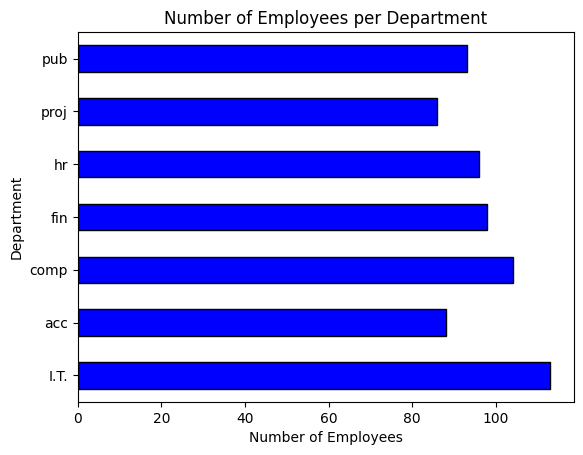

In [103]:
import matplotlib.pyplot as plt

# group the data by department
dept_groups = df.groupby(['dept'])

# Get the count of employees in each department
dept_count = dept_groups.size()

# Create a horizontal bar 
dept_count.plot(kind='barh', color='blue', edgecolor='black')


plt.title('Number of Employees per Department')
plt.xlabel('Number of Employees')
plt.ylabel('Department')


plt.show()


In [90]:
6 - Create a horizontal bar chart with the number of employees per dept

SyntaxError: invalid syntax (2855930612.py, line 1)

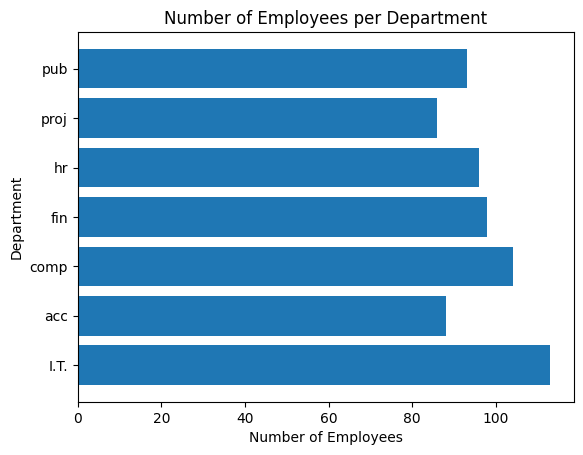

In [104]:
import matplotlib.pyplot as plt

# Count the number of employees in each department
dept_count = df.groupby('dept').size().reset_index(name='counts')

# Create a horizontal bar chart with the count of employees per department
plt.barh(dept_count['dept'], dept_count['counts'])

# Set the title and labels
plt.title('Number of Employees per Department')
plt.xlabel('Number of Employees')
plt.ylabel('Department')

# Show the chart
plt.show()


<h2>Part 2 - a</h2>
1 - Remove the NaN from the mi

In [105]:
df['mi'] = df['mi'].fillna('')
df

,fn,ln,mi,gender,sg,salary,dept,hiredate,termdate,Name
0,Keith,Acevedo,A,M,6,3X406173,hr,5/6/2007,,"Acevedo, Keith A"
1,Shirley,Aguilar,J,F,3,79150,fin,8/9/2016,,"Aguilar, Shirley J"
2,Kimberly,Alexander,F,F,7,3X532531,pub,3/3/2005,,"Alexander, Kimberly F"
3,Patrick,Allison,G,M,6,3X427516,proj,5/30/2008,,"Allison, Patrick G"
4,Logan,Alvarez,G,M,3,70253,I.T.,11/4/2015,,"Alvarez, Logan G"
...,...,...,...,...,...,...,...,...,...,...
673,Henry,Dalton,,M,5,129990,fin,4/26/2016,,NaN
674,Arthur,Glenn,,M,7,3X561896,proj,9/4/2004,11/12/2017,NaN
675,Sean,Shields,,M,6,3X408951,pub,2/21/2011,,NaN
676,Lawrence,Rubio,,M,6,3X499553,acc,11/14/2011,,NaN


2 - Import the dept_CAPSTONE.txt file

In [106]:
import pandas as pd
dpt_df = pd.read_csv(r"\Users\datasound\Downloads\unzip files\dept_CAPSTONE.txt")

#df = employee_df
dpt_df["deptCode"] = dpt_df["'deptCode'"].str.strip("'")
dpt_df = dpt_df.drop(columns = ["'deptCode'"])
dpt_df["dept name"] = dpt_df["'dept name'"].str.strip("'")
dpt_df = dpt_df.drop(columns = ["'dept name'"])

dpt_df


,deptCode,dept name
0,fin,Finance
1,acc,Acco0unting
2,pub,Public Relations
3,hr,Human resou0rses$
4,comp,Lega@l and Compliance
5,proj,Project Management
6,I.T.,Informa1tion Technology


3 - Make the deptCode all caps

In [107]:

dpt_df["deptCode"] = dpt_df["deptCode"].str.upper()
dpt_df


,deptCode,dept name
0,FIN,Finance
1,ACC,Acco0unting
2,PUB,Public Relations
3,HR,Human resou0rses$
4,COMP,Lega@l and Compliance
5,PROJ,Project Management
6,I.T.,Informa1tion Technology


4 - Remove the non alpha characters in the dept name

In [108]:
import re
dpt_df["dept name"] = dpt_df["dept name"].apply(lambda x: re.sub(r'[^a-zA-Z ]+', '', x))

dpt_df

,deptCode,dept name
0,FIN,Finance
1,ACC,Accounting
2,PUB,Public Relations
3,HR,Human resourses
4,COMP,Legal and Compliance
5,PROJ,Project Management
6,I.T.,Information Technology


5 - Make the dept name each word initial caps

In [109]:
dpt_df["dept name"] = dpt_df["dept name"].str.title()
dpt_df

,deptCode,dept name
0,FIN,Finance
1,ACC,Accounting
2,PUB,Public Relations
3,HR,Human Resourses
4,COMP,Legal And Compliance
5,PROJ,Project Management
6,I.T.,Information Technology


6 - Combine the emp_file and the dept_file and join both tables on dept code

In [110]:
import pandas as pd

emp_df = pd.read_csv(r"\Users\datasound\Downloads\Data Science\emp_file_CAPSTONE.txt")



combined_df = pd.merge(emp_df, dpt_df, left_on='dept', right_on='deptCode', how='inner')


combined_df

,fn,ln,mi,gender,sg,salary,dept,hiredate,termdate,deptCode,dept name
0,David,GARCIA,J,M,3,69560,I.T.,11/20/2017,,I.T.,Information Technology
1,Joseph,DAVIS,G,M,4,95368,I.T.,12/2/2015,,I.T.,Information Technology
2,Christopher,HERNANDEZ,J,M,1,26918,I.T.,2/3/2016,,I.T.,Information Technology
3,Daniel,LOPEZ,W,M,1,36181,I.T.,12/16/2015,,I.T.,Information Technology
4,Matthew,GONZALEZ,NaN,M,5,130299,I.T.,7/26/2015,,I.T.,Information Technology
...,...,...,...,...,...,...,...,...,...,...,...
108,Stephen,BRIDGES,A,M,4,98755,I.T.,3/10/2016,,I.T.,Information Technology
109,Larry,ATKINSON,J,M,4,106490,I.T.,10/6/2014,3/28/2016,I.T.,Information Technology
110,Scott,MEZA,F,M,5,122637,I.T.,11/19/2012,,I.T.,Information Technology
111,Ethan,HENSLEY,P,M,5,146943,I.T.,5/29/2011,,I.T.,Information Technology


7 - Create a file called ACTIVE_EMPLOYEES_BY_DEPT. Print list of all employees by dept by hire date (Descending order)
	with terminated employees eliminated

In [111]:
active_employees_df = combined_df[combined_df["termdate"].isna()].sort_values(by=['deptCode', 'hiredate'], ascending=[True,False])

with open("ACTIVE_EMPLOYEES_BY_DEPT.txt", "w") as file:
    file.write(active_employees_df.to_string(index=False))



8 - Create a histogram that shows a count of the number of employees per dept by years employed

C:\Users\spani\AppData\Local\Temp\ipykernel_10384\1714712878.py:7: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  now = pd.to_datetime('now')


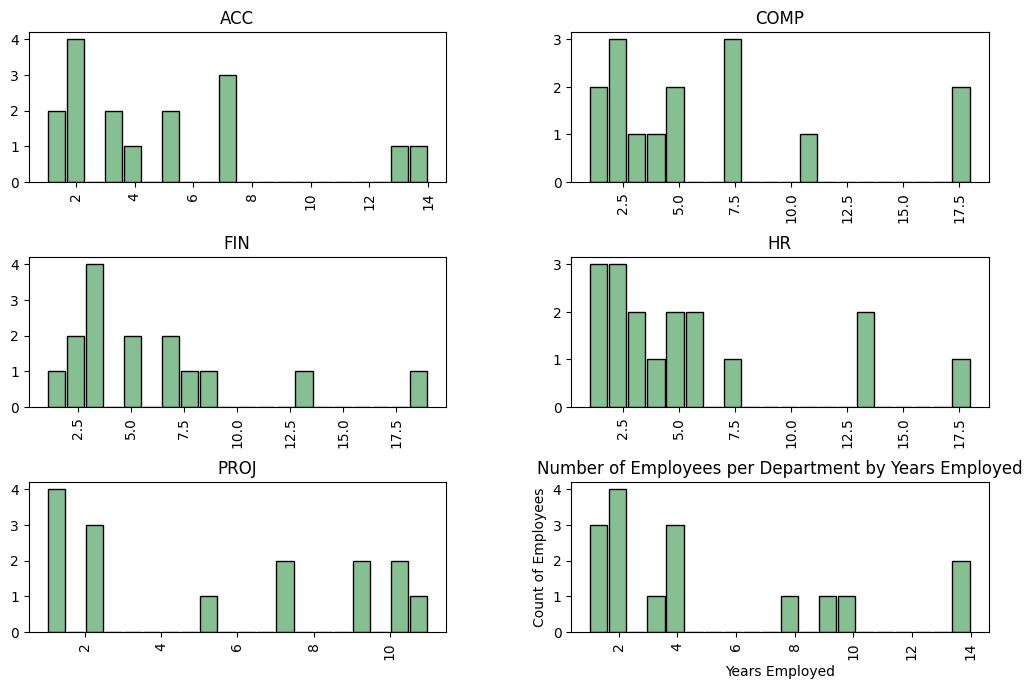

In [112]:

df_hist = pd.read_csv(r'\Users\datasound\Downloads\unzip files\ACTIVE_EMPLOYEES_BY_DEPT.csv', delimiter=',', header=0)
df_hist


# create new column for years of employment
# <m8[Y] is used to convert timespan between the current date and the "hiredate" column it returns a TimeDelta
now = pd.to_datetime('now')
df_hist['years_employed'] = (now - pd.to_datetime(df_hist['hiredate'])).astype('<m8[Y]')

# group by department and years_employed column
df_grouped = df_hist.groupby(['dept','years_employed']).size().reset_index(name='counts')

#create histogram
df_grouped.hist(column='counts', by='dept', bins=20, grid=False, figsize=(12,8), 
               rwidth=0.9, color='#86bf91', zorder=2, edgecolor='black', linewidth=1)
plt.xlabel('Years Employed')
plt.ylabel('Count of Employees')
plt.title('Number of Employees per Department by Years Employed')
plt.show()



<h2>Part 2 - b - SALARY ANALYSIS</h2>
NOTE: A normal distribution has the following attributes:<br>
68% within 1 standard deviation, 95% within 2 STD, 99% within 3 STD<br>
1 - Decode the salaries column

In [135]:
def decode_salary(salary):
    # 0123456789
    # Go back by 3 characters to decode hence the 3 You can manualy match
    # 7890123456
    new_salary = salary
    cypher = {
        '0': '7',
        '1': '8',
        '2': '9',
        '3': '0',
        '4': '1',
        '5': '2',
        '6': '3',
        '7': '4',
        '8': '5',
        '9': '6'
    }
    # remove the 3x
    if 'X' in salary:
        salary = salary[2:]
        salary = str(salary)
        new_salary = ''
        for i in salary:
            new_salary += cypher[i]
    # 
    return new_salary

sal = '3X429110'
new_sal = decode_salary(sal)
print(sal,new_sal)
# remove the '$' first
df['salary'] = df['salary'].apply(lambda sal :sal.replace('$',''))
df['salary'] = df['salary'].apply(lambda sal :decode_salary(sal))
df['new_salary'] = df['salary'].astype('int64')
df



3X429110 196887


,fn,ln,mi,gender,sg,salary,dept,hiredate,termdate,Name,new_salary
0,Keith,Acevedo,A,M,6,173840,hr,5/6/2007,,"Acevedo, Keith A",173840
1,Shirley,Aguilar,J,F,3,79150,fin,8/9/2016,,"Aguilar, Shirley J",79150
2,Kimberly,Alexander,F,F,7,209208,pub,3/3/2005,,"Alexander, Kimberly F",209208
3,Patrick,Allison,G,M,6,194283,proj,5/30/2008,,"Allison, Patrick G",194283
4,Logan,Alvarez,G,M,3,70253,I.T.,11/4/2015,,"Alvarez, Logan G",70253
...,...,...,...,...,...,...,...,...,...,...,...
673,Henry,Dalton,,M,5,129990,fin,4/26/2016,,NaN,129990
674,Arthur,Glenn,,M,7,238563,proj,9/4/2004,11/12/2017,NaN,238563
675,Sean,Shields,,M,6,175628,pub,2/21/2011,,NaN,175628
676,Lawrence,Rubio,,M,6,166220,acc,11/14/2011,,NaN,166220


2 - Create a histogram of all salaries in deciles

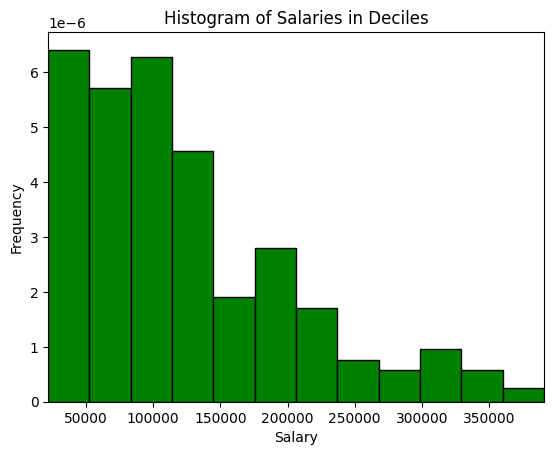

In [122]:

import numpy as np
import matplotlib.pyplot as plt

#create histogram
n, bins, patches = plt.hist(df_hist['salary'], bins=12, density=True, histtype='bar', color='g', label='Salary')

# add black edges to the bars
for i in range(len(patches)):
    patches[i].set_edgecolor("black")
    patches[i].set_linewidth(1)

# set x-axis limits
plt.xlim(df_hist['salary'].min(), df_hist['salary'].max())
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Histogram of Salaries in Deciles')
plt.show()



3 - Calculate the mean, mode, median, and standard deviation of the salaries

In [123]:
import numpy as np

# calculate mean
mean = df_hist['salary'].mean()
print("Mean salary: ", mean)

# calculate mode
mode = df_hist['salary'].mode()
print("Mode salary: ", mode)

# calculate median
median = df_hist['salary'].median()
print("Median salary: ", median)

# calculate standard deviation
std_dev = df_hist['salary'].std()
print("Standard deviation of salary: ", std_dev)
summary_stats = df_hist['salary'].describe()
summary_stats = df_hist['salary'].describe()
print("Summary Stats Shortcut")
print("-----------------------------")
print(summary_stats)



Mean salary:  123370.087890625
Mode salary:  0       21875
1       22036
2       22613
3       22643
4       23523
        ...  
507    358917
508    366437
509    371920
510    380240
511    390932
Name: salary, Length: 512, dtype: int64
Median salary:  103303.0
Standard deviation of salary:  80006.15767222963
Summary Stats Shortcut
-----------------------------
count       512.000000
mean     123370.087891
std       80006.157672
min       21875.000000
25%       64693.000000
50%      103303.000000
75%      173829.500000
max      390932.000000
Name: salary, dtype: float64


4 - Is the salary distribution a normal distribution?

5 - Calculate the mean, mode, median, and standard deviation of the salaries of men

In [124]:
import numpy as np

# filter the dataset to only include men
men = df_hist[df_hist['gender'] == 'M']

# calculate mean
mean = men['salary'].mean()
print("Mean salary of men: ", mean)

# calculate mode
mode = men['salary'].mode()
print("Mode salary of men: ", mode)

# calculate median
median = men['salary'].median()
print("Median salary of men: ", median)

# calculate standard deviation
std_dev = men['salary'].std()
print("Standard deviation of salary of men: ", std_dev)
print("="*55, str)
df_hist['salary'] = df_hist['salary'].round(2)
print(df_hist['salary'].describe())



Mean salary of men:  124506.92917847025
Mode salary of men:  0       22036
1       22613
2       24222
3       24971
4       25074
        ...  
348    358917
349    366437
350    371920
351    380240
352    390932
Name: salary, Length: 353, dtype: int64
Median salary of men:  103140.0
Standard deviation of salary of men:  82939.05426075381
======================================================= <class 'str'>
count       512.000000
mean     123370.087891
std       80006.157672
min       21875.000000
25%       64693.000000
50%      103303.000000
75%      173829.500000
max      390932.000000
Name: salary, dtype: float64


6 - Calculate the mean, mode, median, and standard deviation of the salaries of women

In [125]:
import numpy as np

# filter the dataset to only include women
women = df_hist[df_hist['gender'] == 'F']

if not women.empty:
    # calculate mean
    mean = women['salary'].mean()
    print("Mean salary of women: ", mean)

    # calculate mode
    mode = women['salary'].mode()
    print("Mode salary of women: ", mode)

    # calculate median
    median = women['salary'].median()
    print("Median salary of women: ", median)

    # calculate standard deviation
    std_dev = women['salary'].std()
    print("Standard deviation of salary of women: ", std_dev)
else:
    print("No data found for women group.")



Mean salary of women:  120846.1572327044
Mode salary of women:  0       21875
1       22643
2       23523
3       25937
4       26545
        ...  
154    307523
155    310449
156    336892
157    345553
158    346862
Name: salary, Length: 159, dtype: int64
Median salary of women:  104220.0
Standard deviation of salary of women:  73263.27842826446


7 - Is the standard deviation, mean, mode, median higher for men? Calulate the % difference

In [126]:
# filter the dataset to only include men
men = df_hist[df_hist['gender'] == 'M']

# calculate mean for men
men_mean = men['salary'].mean()

# filter the dataset to only include women
women = df_hist[df_hist['gender'] == 'F']

# calculate mean for women
women_mean = women['salary'].mean()

# calculate the percentage difference
diff = (men_mean - women_mean) / women_mean * 100

if diff > 0:
    print(f'The mean salary of men is {diff:.2f}% higher than the mean salary of women')
else:
    print(f'The mean salary of men is {-diff:.2f}% lower than the mean salary of women')
# mode
# filter the dataset to only include men
men = df_hist[df_hist['gender'] == 'M']

# calculate mode for men
men_mode = men['salary'].mode()

# filter the dataset to only include women
women = df_hist[df_hist['gender'] == 'F']

# calculate mode for women
women_mode = women['salary'].mode()

# calculate the percentage difference
diff = (men_mode[0] - women_mode[0]) / women_mode[0] * 100

if diff > 0:
    print(f'The mode salary of men is {diff:.2f}% higher than the mode salary of women')
else:
    print(f'The mode salary of men is {-diff:.2f}% lower than the mode salary of women')

# median

# filter the dataset to only include men
men = df_hist[df_hist['gender'] == 'M']

# calculate median for men
men_median = men['salary'].median()

# filter the dataset to only include women
women = df_hist[df_hist['gender'] == 'F']

# calculate median for women
women_median = women['salary'].median()

# calculate the percentage difference
diff = (men_median - women_median) / women_median * 100

if diff > 0:
    print(f'The median salary of men is {diff:.2f}% higher than the median salary of women')
else:
    print(f'The median salary of men is {-diff:.2f}% lower than the median salary of women')


# std

# filter the dataset to only include men
men = df_hist[df_hist['gender'] == 'M']

# calculate standard deviation for men
men_std = men['salary'].std()

# filter the dataset to only include women
women = df_hist[df_hist['gender'] == 'F']

# calculate standard deviation for women
women_std = women['salary'].std()

# calculate the percentage difference
diff = (men_std - women_std) / women_std * 100

if diff > 0:
    print(f'The standard deviation of men salary is {diff:.2f}% higher than the standard deviation of women salary')
else:
    print(f'The standard deviation of men salary is {-diff:.2f}% lower than the standard deviation of women salary')

   




The mean salary of men is 3.03% higher than the mean salary of women
The mode salary of men is 0.74% higher than the mode salary of women
The median salary of men is 1.04% lower than the median salary of women
The standard deviation of men salary is 13.21% higher than the standard deviation of women salary


8 - Write up- Do you think there is salary bias?

<h3>it is difficult to say definitively whether there is a salary bias without more context and information. However, the statistics provided do suggest that there may be some differences in the salaries of men and women.
The mean salary of men being 3.03% higher than the mean salary of women suggests that, on average, men may be earning more than women. However, it is important to note that the mean can be influenced by outliers, so it is not always the best indicator of central tendency.
The mode salary of men being 0.74% higher than the mode salary of women suggests that there may be more men in the highest salary bracket than women.
The median salary of men being 1.04% lower than the median salary of women may suggest that men and women are more evenly distributed in terms of salary, with the median salary being a better indicator of central tendency.
The standard deviation of men salary being 13.21% higher than the standard deviation of women salary suggests that there is a greater spread in the salaries of men compared to women. This could be interpreted as men having a wider range of salaries, with some earning significantly more than others, while women's salaries may be more concentrated around the median.</h3>


<h2>Part 2 - c</h2>
The salary grades of 5 - 7 are considered executive salary grades - Exempt or EXECUTIVE<br>
1 - create a new column called 'Status' Label each employee record in alpha order by name as EXEMPT or NON-EXEMPT

In [128]:
# create a new column 'Status'
df_hist['Status'] = 'NON-EXEMPT'

# label records with salary grades 5-7 as 'EXEMPT'
df_hist.loc[(df_hist['sg'] >= 5) & (df_hist['sg'] <= 7), 'Status'] = 'EXEMPT'
df_hist

,fn,ln,mi,gender,sg,salary,dept,hiredate,termdate,deptCode,deptName,Column1,years_employed,Status
0,Jacob,ROSALES,NaN,M,2,54720,PUB,10/13/2018,NaN,PUB,Public Relations,NaN,4.0,NON-EXEMPT
1,Ryan,ROBINSON,A,M,3,93952,PUB,10/12/2018,NaN,PUB,Public Relations,NaN,4.0,NON-EXEMPT
2,Jerry,BARRERA,P,M,3,75908,PUB,9/19/2018,NaN,PUB,Public Relations,NaN,4.0,NON-EXEMPT
3,Tyler,FRANKLIN,J,M,3,86583,PUB,8/3/2018,NaN,PUB,Public Relations,NaN,4.0,NON-EXEMPT
4,Ethan,GILBERT,NaN,M,3,79105,PUB,7/16/2018,NaN,PUB,Public Relations,NaN,4.0,NON-EXEMPT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,Adam,BARRON,G,M,7,333627,ACC,4/29/2005,NaN,ACC,Accounting,NaN,17.0,EXEMPT
508,Natalie,BALDWIN,G,F,7,225262,ACC,12/5/2004,NaN,ACC,Accounting,NaN,18.0,EXEMPT
509,Charles,SUAREZ,NaN,M,7,322450,ACC,4/11/2004,NaN,ACC,Accounting,NaN,18.0,EXEMPT
510,Roger,BENITEZ,F,M,7,339524,ACC,11/29/2003,NaN,ACC,Accounting,NaN,19.0,EXEMPT


2 - Calculate the mean, mode, median, and standard deviation of the salaries of each salary grade

In [129]:
#group the data by salary_grade
df_grade = df_hist.groupby('sg')

#calculate the mean, mode, median, and standard deviation of the salary column for each salary grade
mean_grade = df_grade['salary'].mean()
mode_grade = df_grade['salary'].apply(lambda x: x.mode()[0])
median_grade = df_grade['salary'].median()
std_grade = df_grade['salary'].std()

#print the results
print("Mean salary by grade: \n",mean_grade)
print("\n Mode salary by grade: \n",mode_grade)
print("\n Median salary by grade: \n",median_grade)
print("\n Standard deviation salary by grade: \n",std_grade)




Mean salary by grade: 
 sg
1     32864.584615
2     53987.464789
3     79075.050000
4    104077.313253
5    129009.029851
6    181910.029412
7    272029.089744
Name: salary, dtype: float64

 Mode salary by grade: 
 sg
1     21875
2     37865
3     55463
4     76809
5    100202
6    154840
7    196887
Name: salary, dtype: int64

 Median salary by grade: 
 sg
1     32513.0
2     52082.0
3     78271.0
4    103988.0
5    129655.0
6    182601.0
7    262586.0
Name: salary, dtype: float64

 Standard deviation salary by grade: 
 sg
1     8053.594853
2     8423.965311
3     9517.893027
4     9745.557305
5    11073.768992
6    12761.821685
7    51828.116930
Name: salary, dtype: float64


In [130]:
import pandas as pd

#group the data by salary_grade
df_grade = df_hist.groupby('sg')

#calculate the mean, mode, median, and standard deviation of the salary column for each salary grade
mean_grade = df_grade['salary'].mean()
mode_grade = df_grade['salary'].apply(lambda x: x.mode()[0])
median_grade = df_grade['salary'].median()
std_grade = df_grade['salary'].std()

#create a new DataFrame with the calculated statistics as its columns and the salary grades as its index
df_result = pd.DataFrame({'Mean': mean_grade, 'Mode': mode_grade, 'Median': median_grade,'Standard Deviation': std_grade})

#print the results
print(df_result)


             Mean    Mode    Median  Standard Deviation
sg                                                     
1    32864.584615   21875   32513.0         8053.594853
2    53987.464789   37865   52082.0         8423.965311
3    79075.050000   55463   78271.0         9517.893027
4   104077.313253   76809  103988.0         9745.557305
5   129009.029851  100202  129655.0        11073.768992
6   181910.029412  154840  182601.0        12761.821685
7   272029.089744  196887  262586.0        51828.116930


3 - Calculate the mean, mode, median, and standard deviation of the salaries of EXEMPT employees

In [131]:
import pandas as pd

# select only the rows where the "Status" column is "EXEMPT"
df_exempt = df_hist[df_hist["Status"] == "EXEMPT"]

# calculate mean
mean = df_exempt["salary"].mean()

# calculate mode
mode = df_exempt["salary"].mode()[0]

# calculate median
median = df_exempt["salary"].median()

# calculate standard deviation
std = df_exempt["salary"].std()

# create a dataframe to hold the results
data = {"Mean": mean, "Mode": mode, "Median": median, "Standard Deviation": std}
results_df = pd.DataFrame(data, index=["Values For EXEMPT Workers"])

print(results_df)



                                   Mean    Mode    Median  Standard Deviation
Values For EXEMPT Workers  198271.15493  100202  185599.0        68328.951166


4 - Calculate the mean, mode, median, and standard deviation of the salaries of NON-EXEMPT employees

In [132]:
import pandas as pd

# select only the rows where the "Status" column is "EXEMPT"
df_non_exempt = df_hist[df_hist["Status"] == "NON-EXEMPT"]

# calculate mean
mean = df_non_exempt["salary"].mean()

# calculate mode
mode = df_non_exempt["salary"].mode()[0]

# calculate median
median = df_non_exempt["salary"].median()

# calculate standard deviation
std = df_non_exempt["salary"].std()

# create a dataframe to hold the results
data = {"Mean": mean, "Mode": mode, "Median": median, "Standard Deviation": std}
results_df = pd.DataFrame(data, index=["Values For NON-EXEMPT"])

print(results_df)


                               Mean   Mode   Median  Standard Deviation
Values For NON-EXEMPT  70012.471572  21875  70288.0        28074.595215


5 - Create pie charts of the employee status of EXEMPT count by gender and NON-EXEMPT count by gender

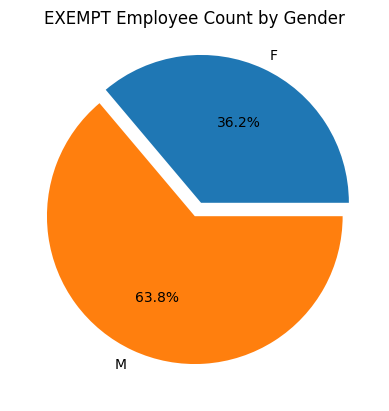

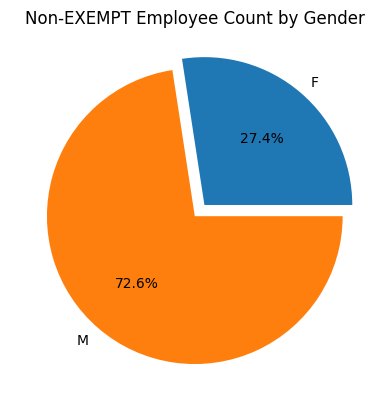

In [133]:
import matplotlib.pyplot as plt

# Group data by gender and employee status
grouped = df_hist.groupby(['gender','Status'])

# Count the number of employees in each group
counts = grouped.size().reset_index(name='counts')

# Create a pie chart for the EXEMPT group
exempt = counts[counts['Status'] == 'EXEMPT']
plt.pie(exempt['counts'], labels=exempt['gender'], autopct='%1.1f%%',explode=[0.1,0])
plt.title("EXEMPT Employee Count by Gender")
plt.show()

# Create a pie chart for the Non-EXEMPT group
non_exempt = counts[counts['Status'] == 'NON-EXEMPT']
plt.pie(non_exempt['counts'], labels=non_exempt['gender'], autopct='%1.1f%%',explode=[0.1,0])
plt.title("Non-EXEMPT Employee Count by Gender")
plt.show()


6 - Create scatter plots of salary grade by mean salary

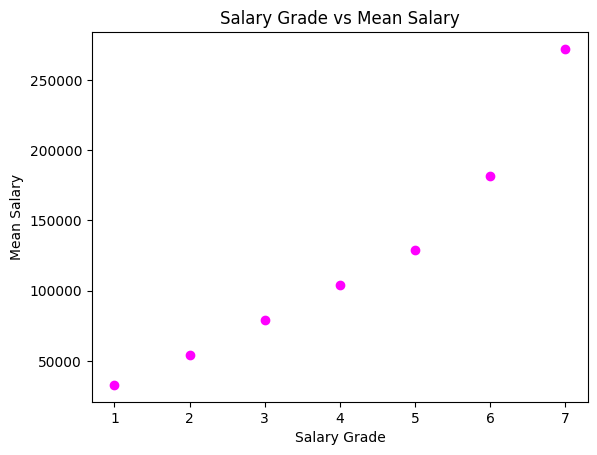

In [134]:
import matplotlib.pyplot as plt

# Group data by salary grade
grouped = df_hist.groupby(['sg'])

# calculate mean salary for each group
mean_salary = grouped['salary'].mean()

# create a scatter plot
plt.scatter(mean_salary.index, mean_salary.values, color = "magenta")
plt.xlabel("Salary Grade")
plt.ylabel("Mean Salary")
plt.title("Salary Grade vs Mean Salary")
plt.show()


7 - Create a scatter plots of salary grade by mean salary for men

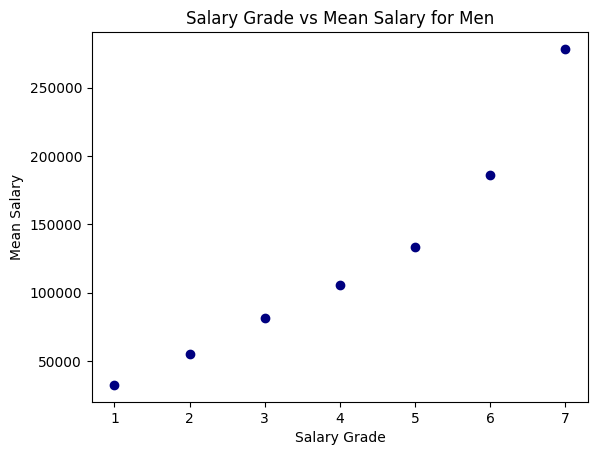

In [24]:
import matplotlib.pyplot as plt

# Group data by salary grade and gender
grouped = df_hist.groupby(['sg','gender'])

# calculate mean salary for each group
mean_salary = grouped['salary'].mean().reset_index()

# filter the data for men
men_data = mean_salary[mean_salary['gender'] == 'M']

# create a scatter plot with navy blue dots
plt.scatter(men_data['sg'], men_data['salary'], color='navy')
plt.xlabel("Salary Grade")
plt.ylabel("Mean Salary")
plt.title("Salary Grade vs Mean Salary for Men")
plt.show()


8 - Create a scatter plots of salary grade by mean salary for women

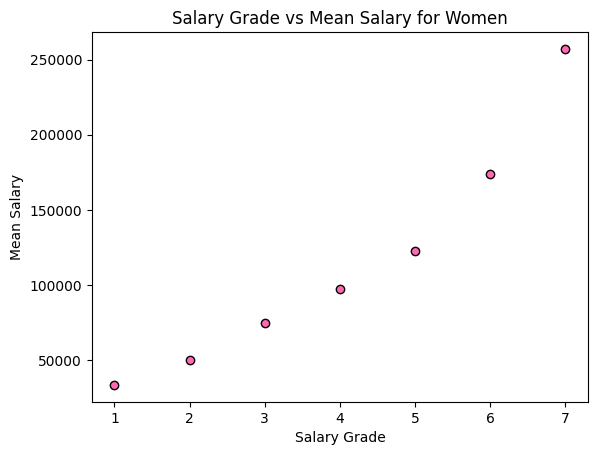

In [25]:
import matplotlib.pyplot as plt

# Group data by salary grade and gender
grouped = df_hist.groupby(['sg','gender'])

# calculate mean salary for each group
mean_salary = grouped['salary'].mean().reset_index()

# filter the data for women
women_data = mean_salary[mean_salary['gender'] == 'F']

# create a scatter plot with hot pink dots
plt.scatter(women_data['sg'], women_data['salary'], color='hotpink', edgecolor='black', linewidth=1)
plt.xlabel("Salary Grade")
plt.ylabel("Mean Salary")
plt.title("Salary Grade vs Mean Salary for Women")
plt.show()


9 - Create a horizontal bar chart of EXEMPT employees by mean salary for men and women (1 chart)

C:\Users\spani\AppData\Local\Temp\ipykernel_4144\1786923275.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  exempt_data = exempt_data.append(grouped.get_group(('F','EXEMPT')))
C:\Users\spani\AppData\Local\Temp\ipykernel_4144\1786923275.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_salary = exempt_data.groupby(['gender']).mean()['salary']


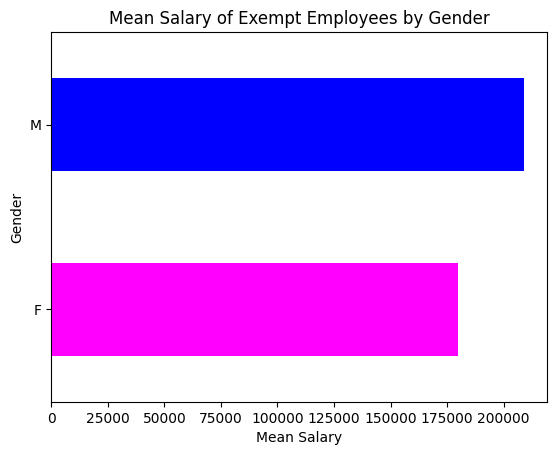

In [26]:
import matplotlib.pyplot as plt

# Group data by gender and Status
grouped = df_hist.groupby(['gender','Status'])

# filter the data for exempt employees
exempt_data = grouped.get_group(('M','EXEMPT'))
exempt_data = exempt_data.append(grouped.get_group(('F','EXEMPT')))

# calculate mean salary for each group
mean_salary = exempt_data.groupby(['gender']).mean()['salary']

# create a horizontal bar chart
mean_salary.plot(kind='barh', color = ["magenta","blue"])
plt.xlabel("Mean Salary")
plt.ylabel("Gender")
plt.title("Mean Salary of Exempt Employees by Gender")
plt.show()


10- Create a horizontal bar chart of NON-EXEMPT employees by mean salary for men and women (1 chart)

C:\Users\spani\AppData\Local\Temp\ipykernel_4144\91104217.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  non_exempt_data = non_exempt_data.append(grouped.get_group(('F','NON-EXEMPT')))
C:\Users\spani\AppData\Local\Temp\ipykernel_4144\91104217.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_salary = non_exempt_data.groupby(['gender']).mean()['salary']


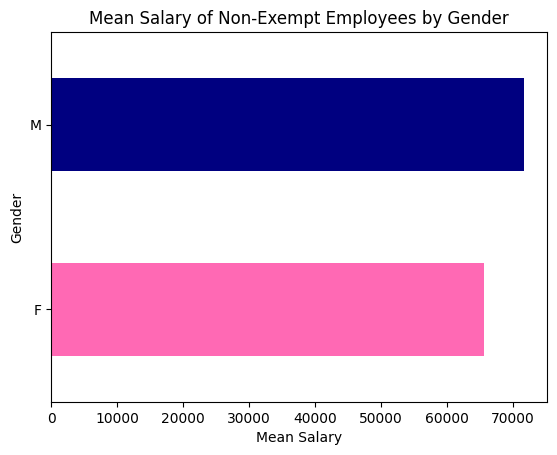

In [27]:
import matplotlib.pyplot as plt

# Group data by gender and Status
grouped = df_hist.groupby(['gender','Status'])

# filter the data for non-exempt employees
non_exempt_data = grouped.get_group(('M','NON-EXEMPT'))
non_exempt_data = non_exempt_data.append(grouped.get_group(('F','NON-EXEMPT')))

# calculate mean salary for each group
mean_salary = non_exempt_data.groupby(['gender']).mean()['salary']

# create a horizontal bar chart
mean_salary.plot(kind='barh', color = ["hotpink","navy"])
plt.xlabel("Mean Salary")
plt.ylabel("Gender")
plt.title("Mean Salary of Non-Exempt Employees by Gender")
plt.show()


<h2>Part 3a - Create employee Id</h2>
To construct the employee id for everyone use the following formula<br>
First 3 letters of the last name + first 3 letters of the last name + a random 3 digit number from (1 - 99)<br>
For example the employee name is Kevin Smith id = 'SMIKEV07'<br>
In the case of people with the same last name and first name generate a new number<br>
No duplication<br>
1 - List all employees in employee id order<br>

In [48]:
import pandas as pd
import random

# read your data into a dataframe
df_hist = pd.read_csv(r"\Users\spani\Downloads\unzip files\ACTIVE_EMPLOYEES_BY_DEPT.csv")
df_hist = df_hist.drop('Column1', axis=1)
df_hist['ID'] = df_hist.apply(lambda row: row['ln'][:3] + row['fn'][:3] + str(random.randint(100,999)), axis=1)
while len(df_hist['ID'].unique()) < len(df_hist):
    df_hist['ID'] = df_hist.apply(lambda row: row['ln'][:3] + row['fn'][:3] + str(random.randint(100,999)), axis=1)

df_hist = df_hist.sort_values(by='ID')
df_hist.index = df_hist['ID']
df_hist = df_hist.drop('ID', axis=1)

df_hist = df_hist[cols]



df_hist.head(50)





,fn,ln,mi,gender,sg,salary,dept,hiredate,termdate,deptCode,deptName
ID,,,,,,,,,,,
ABBRay205,Raymond,ABBOTT,NaN,M,7,3X654139,PUB,12/28/2002,NaN,PUB,Public Relations
ACEKei859,Keith,ACEVEDO,A,M,6,3X406173,HR,5/6/2007,NaN,HR,Human resourses
ACOPat830,Patricia,ACOSTA,NaN,F,2,58475,HR,3/5/2018,NaN,HR,Human resourses
ADABen391,Benjamin,ADAMS,NaN,M,2,67712,COMP,3/21/2015,NaN,COMP,Legal and Compliance
AGUJam865,James,AGUIRRE,NaN,M,3,79153,PROJ,10/17/2016,NaN,PROJ,Project Management
AGUShi911,Shirley,AGUILAR,J,F,3,79150,FIN,8/9/2016,NaN,FIN,Finance
ALEKim618,Kimberly,ALEXANDER,F,F,7,3X532531,PUB,3/3/2005,NaN,PUB,Public Relations
ALIZac900,Zachary,ALI,NaN,M,1,30794,COMP,4/7/2018,NaN,COMP,Legal and Compliance
ALLPat516,Patrick,ALLISON,G,M,6,3X427516,PROJ,5/30/2008,NaN,PROJ,Project Management


<h2>Part 3b -Raises</h2>
1 - Import the file raises_CAPSTONE.txt<br>
2 - The rules for giving a raise are in the file but be careful of the order that your run the raise<br>
3 - Based on each employees salary calculate 2 fields 'Raise_Amount' and 'New_Salary'<br>
4 - Calculate the total salary for each dept<br>
5 - Chart the total salary for each dept in 1 bar chart<br>
6 - Create a pie chart that shows the percentage that each dept has of the total money allocated for raises<br>
7 - Create a pie chart to show the percent of men vs women for the raise money allocated<br>
8 - Create a pie chart to show the percent of men vs women for the raise money allocated by dept<br>
9 - Create a dataframe for promotions.  If the persons salary excedes the salary max for their salary grade. create a column<br>
called 'Promotion' and add the string 'PROMOTION DUE' otherwise leave blank<br>


In [30]:
import pandas as pd

# Step 1: Create a new column for Years_of_Service
df_hist['Years_of_Service'] = pd.to_datetime('now').year - pd.to_datetime(df_hist['hiredate']).dt.year

# Step 2: Create function to determine raise percentage based on years of service
def determine_raise(years_of_service):
    if years_of_service > 10:
        return 0.1
    elif years_of_service > 7:
        return 0.08
    elif years_of_service > 5:
        return 0.06
    elif years_of_service > 3:
        return 0.04
    elif years_of_service > 2:
        return 0.035
    elif years_of_service > 1:
        return 0.03
    else:
        return 0

# Step 3: Apply function to 'Years_of_Service' column
df_hist['Raise_Percent'] = df_hist['Years_of_Service'].apply(determine_raise)

# Step 4: Create 'Raise_Amount' column
df_hist['Raise_Amount'] = df_hist['salary'] * df_hist['Raise_Percent']

# Step 5: Create 'New_Salary' column
df_hist['New_Salary'] = df_hist['salary'] + df_hist['Raise_Amount']

df_hist



C:\Users\spani\AppData\Local\Temp\ipykernel_10384\3690191629.py:4: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df_hist['Years_of_Service'] = pd.to_datetime('now').year - pd.to_datetime(df_hist['hiredate']).dt.year


,fn,ln,mi,gender,sg,salary,dept,hiredate,termdate,deptCode,deptName,Column1,years_employed,Years_of_Service,Raise_Percent,Raise_Amount,New_Salary
0,Jacob,ROSALES,NaN,M,2,54720,PUB,10/13/2018,NaN,PUB,Public Relations,NaN,4.0,5,0.04,2188.80,56908.80
1,Ryan,ROBINSON,A,M,3,93952,PUB,10/12/2018,NaN,PUB,Public Relations,NaN,4.0,5,0.04,3758.08,97710.08
2,Jerry,BARRERA,P,M,3,75908,PUB,9/19/2018,NaN,PUB,Public Relations,NaN,4.0,5,0.04,3036.32,78944.32
3,Tyler,FRANKLIN,J,M,3,86583,PUB,8/3/2018,NaN,PUB,Public Relations,NaN,4.0,5,0.04,3463.32,90046.32
4,Ethan,GILBERT,NaN,M,3,79105,PUB,7/16/2018,NaN,PUB,Public Relations,NaN,4.0,5,0.04,3164.20,82269.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,Adam,BARRON,G,M,7,333627,ACC,4/29/2005,NaN,ACC,Accounting,NaN,17.0,18,0.10,33362.70,366989.70
508,Natalie,BALDWIN,G,F,7,225262,ACC,12/5/2004,NaN,ACC,Accounting,NaN,18.0,19,0.10,22526.20,247788.20
509,Charles,SUAREZ,NaN,M,7,322450,ACC,4/11/2004,NaN,ACC,Accounting,NaN,18.0,19,0.10,32245.00,354695.00
510,Roger,BENITEZ,F,M,7,339524,ACC,11/29/2003,NaN,ACC,Accounting,NaN,19.0,20,0.10,33952.40,373476.40


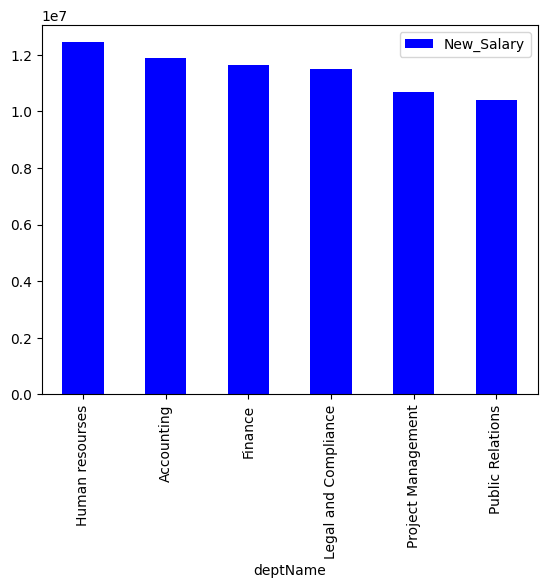

In [39]:
import matplotlib.pyplot as plt

df_dept_salary = df_hist.groupby('deptName')['New_Salary'].sum().reset_index()
df_dept_salary.sort_values(by='New_Salary', ascending=False, inplace=True)

ax = df_dept_salary.plot(kind='bar', x='deptName', y='New_Salary', color = 'blue')


plt.show()



In [41]:
df_dept_salary = df_hist.groupby('deptName')['New_Salary'].sum().reset_index()
df_dept_salary

,deptName,New_Salary
0,Accounting,11891695.36
1,Finance,11648545.96
2,Human resourses,12437008.34
3,Legal and Compliance,11482937.48
4,Project Management,10670012.72
5,Public Relations,10420401.24


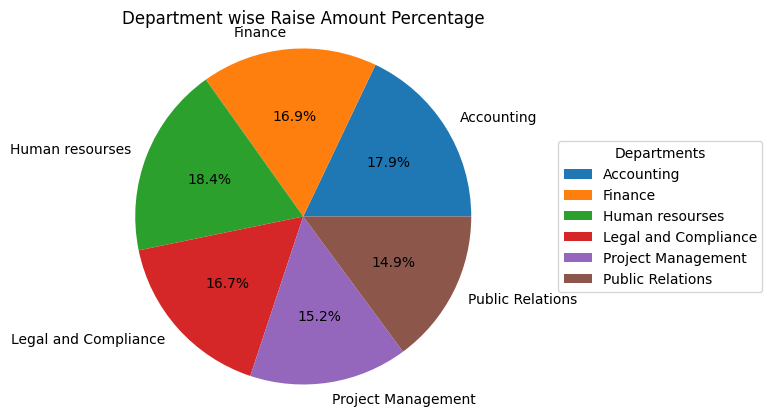

In [47]:
import matplotlib.pyplot as plt

df_dept_salary = df_hist.groupby('deptName')['Raise_Amount'].sum().reset_index()

plt.pie(df_dept_salary['Raise_Amount'], labels=df_dept_salary['deptName'], 
        autopct='%1.1f%%')
plt.axis('equal')

plt.legend(title = "Departments",loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Department wise Raise Amount Percentage" )
plt.axis('equal')





plt.show()


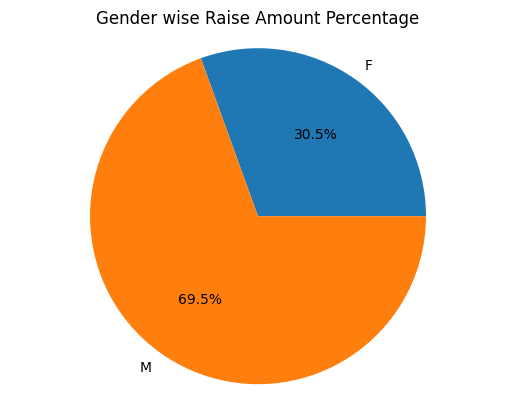

In [50]:
import matplotlib.pyplot as plt

df_gender_salary = df_hist.groupby('gender')['Raise_Amount'].sum().reset_index()

plt.pie(df_gender_salary['Raise_Amount'], labels=df_gender_salary['gender'], 
        autopct='%1.1f%%')
plt.title("Gender wise Raise Amount Percentage")
plt.axis('equal')
plt.show()


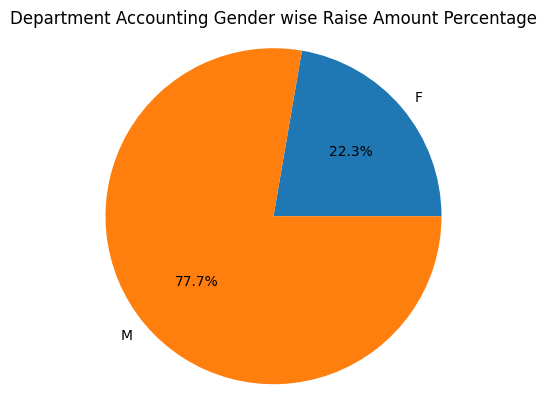

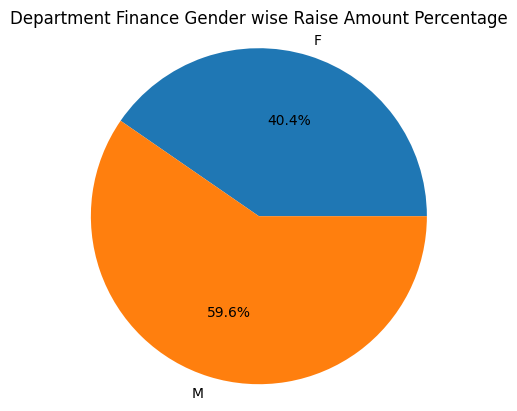

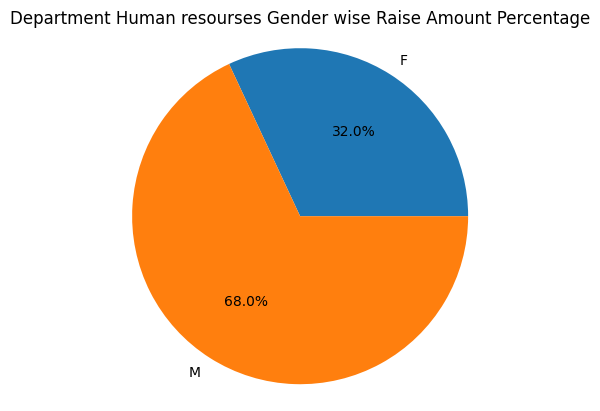

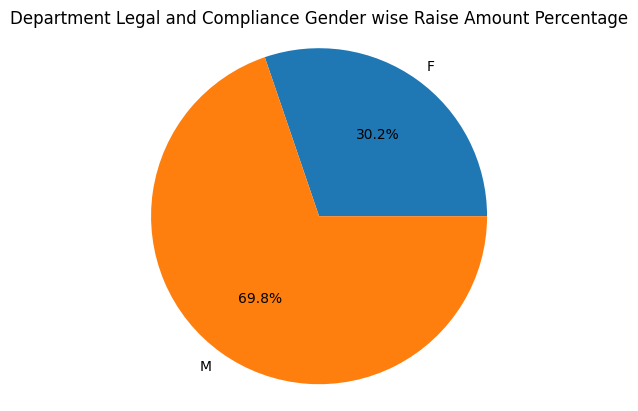

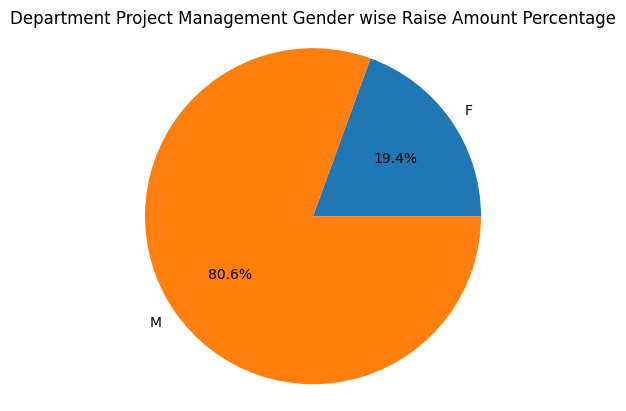

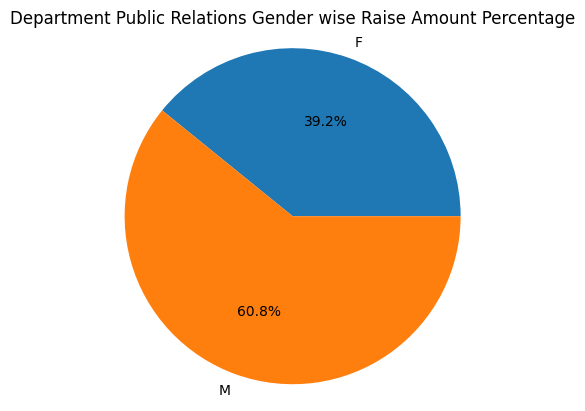

In [56]:
import matplotlib.pyplot as plt

df_gender_dept_salary = df_hist.groupby(['deptName','gender'])['Raise_Amount'].sum().reset_index()

for dept in df_gender_dept_salary['deptName'].unique():
    df_dept = df_gender_dept_salary[df_gender_dept_salary['deptName'] == dept]
    plt.pie(df_dept['Raise_Amount'], labels=df_dept['gender'], 
        autopct='%1.1f%%')
    plt.title(f"Department {dept} Gender wise Raise Amount Percentage")
    plt.axis('equal')

   
    
    
    
    plt.show()


In [76]:
df_sggrade = pd.read_csv(r"\Users\spani\Downloads\unzip files\salary_grade_CAPSTONE.txt")
df_sggrade = df_sggrade.replace(to_replace='"', value='', regex=True)
df_sggrade = df_sggrade.replace(to_replace='$', value='', regex=True)
df_sggrade = df_sggrade.replace(to_replace= "''", value='', regex=True)
df_sggrade.columns = df_sggrade.columns.str.replace("'", "")
df_sggrade = df_sggrade.rename(columns={'grade': 'sg'})
df_sggrade = df_sggrade.set_index('sg')
df_sggrade = df_sggrade.rename(columns={'end_salary': 'max_salary'})


# merge the two dataframes on the 'sg' column
df_merged = pd.merge(df_hist, df_sggrade, on='sg')

# cast 'salary' and 'max_salary' columns to string
df_merged['salary'] = df_merged['salary'].astype(str)
df_merged['max_salary'] = df_merged['max_salary'].astype(str)

#remove unwanted characters from salary and max_salary columns
df_merged['salary'] = df_merged['salary'].str.replace(',','')
df_merged['salary'] = df_merged['salary'].str.replace('$','')
df_merged['max_salary'] = df_merged['max_salary'].str.replace(',','')
df_merged['max_salary'] = df_merged['max_salary'].str.replace('$','')

# cast 'salary' and 'max_salary' columns to float
df_merged['salary'] = df_merged['salary'].astype(float)
df_merged['max_salary'] = df_merged['max_salary'].astype(float)
# create a new column called 'Promotion'
df_merged['Promotion'] = ''

# function to check if salary exceeds max_salary
def check_promotion(row):
    if row['New_Salary'] > row['max_salary']:
        return 'PROMOTION DUE'
    else:
        return ''

# apply the function to each row in the dataframe
df_merged['Promotion'] = df_merged.apply(check_promotion, axis=1)

df_merged.head(50)

C:\Users\spani\AppData\Local\Temp\ipykernel_10384\2548063661.py:20: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_merged['salary'] = df_merged['salary'].str.replace('$','')
C:\Users\spani\AppData\Local\Temp\ipykernel_10384\2548063661.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_merged['max_salary'] = df_merged['max_salary'].str.replace('$','')


,fn,ln,mi,gender,sg,salary,dept,hiredate,termdate,deptCode,deptName,Column1,years_employed,Years_of_Service,Raise_Percent,Raise_Amount,New_Salary,begin_salary,max_salary,Promotion
0,Jacob,ROSALES,NaN,M,2,54720.0,PUB,10/13/2018,NaN,PUB,Public Relations,NaN,4.0,5,0.04,2188.80,56908.80,$40000,65000.0,
1,Brandon,GROSS,F,M,2,43744.0,PUB,9/18/2017,NaN,PUB,Public Relations,NaN,5.0,6,0.06,2624.64,46368.64,$40000,65000.0,
2,Shirley,LOWE,NaN,F,2,37865.0,PUB,1/19/2017,NaN,PUB,Public Relations,NaN,5.0,6,0.06,2271.90,40136.90,$40000,65000.0,
3,Lawrence,GUERRA,NaN,M,2,56471.0,PUB,12/21/2016,NaN,PUB,Public Relations,NaN,6.0,7,0.06,3388.26,59859.26,$40000,65000.0,
4,Marilyn,FERGUSON,NaN,F,2,62321.0,PUB,12/29/2015,NaN,PUB,Public Relations,NaN,7.0,8,0.08,4985.68,67306.68,$40000,65000.0,PROMOTION DUE
5,Wayne,MAXWELL,J,M,2,62797.0,PUB,12/21/2015,NaN,PUB,Public Relations,NaN,7.0,8,0.08,5023.76,67820.76,$40000,65000.0,PROMOTION DUE
6,Gabriel,GRAY,NaN,M,2,44651.0,PUB,11/18/2015,NaN,PUB,Public Relations,NaN,7.0,8,0.08,3572.08,48223.08,$40000,65000.0,
7,Raymond,HARPER,NaN,M,2,49376.0,PUB,10/31/2015,NaN,PUB,Public Relations,NaN,7.0,8,0.08,3950.08,53326.08,$40000,65000.0,
8,Russell,PATEL,J,M,2,44919.0,PUB,3/16/2015,NaN,PUB,Public Relations,NaN,7.0,8,0.08,3593.52,48512.52,$40000,65000.0,
9,Roy,MENDOZA,NaN,M,2,64788.0,PUB,2/2/2015,NaN,PUB,Public Relations,NaN,7.0,8,0.08,5183.04,69971.04,$40000,65000.0,PROMOTION DUE


<h2>Part 4 - Analysis</h2>
1 - Write about any conclusions you drew from the data.
2 - Are there any additional charts or analysis you could include to bolster your conclusions

In [ ]:
# Base on the data, it can be concluded that a larger percentage of men will receive raises than women. Additional charts and analysis that could be used to bolster the conclusions include:

Box plots: These can show the distribution of salary for men and women, including the median, quartiles, and any outliers.
Men had a more outliers in the upper values than women. 

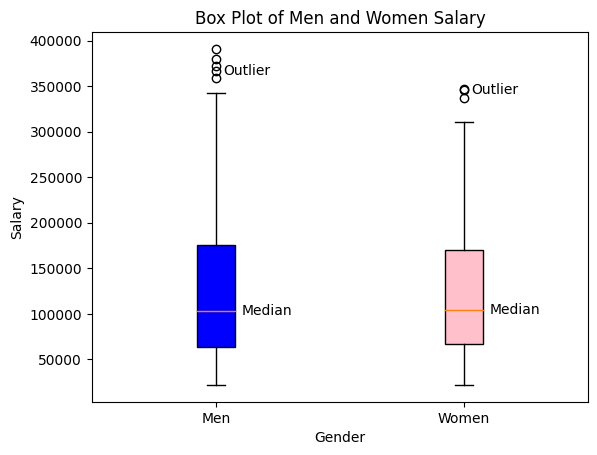

In [157]:
import matplotlib.pyplot as plt

# Box plot
bp = plt.boxplot([men_df['salary'], women_df['salary']], labels=['Men', 'Women'], patch_artist=True)
colors = ['blue', 'pink']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    
# Add labels for median and outliers
for line in bp['medians']:
    x, y = line.get_xydata()[1]
    plt.text(x+0.03, y, 'Median', va='center')

for scatter in bp['fliers']:
    x, y = scatter.get_data()
    plt.text(x[0]+0.03, y[0], 'Outlier', va='center')
    
plt.title('Box Plot of Men and Women Salary')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()





In [ ]:
# Histograms: These can show the frequency distribution of salary for men and women, which can help identify any patterns or discrepancies.

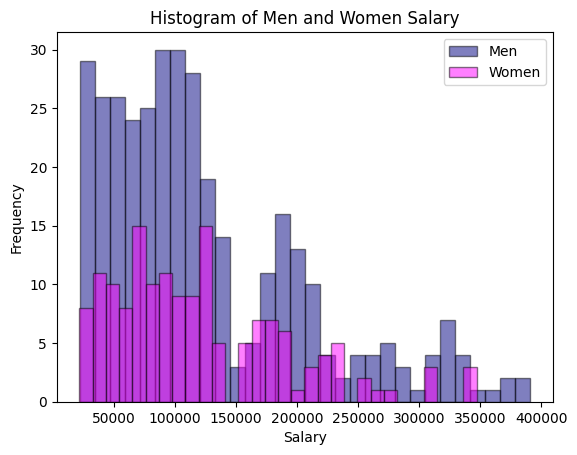

In [144]:
import matplotlib.pyplot as plt
import numpy as np

men_df = df_hist[df_hist['gender'] == 'M']
women_df = df_hist[df_hist['gender'] == 'F']

# Histogram
plt.hist(men_df['salary'], bins=30, alpha=0.5, label='Men', color = 'navy', edgecolor='black')
plt.hist(women_df['salary'], bins=30, alpha=0.5, label='Women', color = 'magenta', edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Histogram of Men and Women Salary')
plt.legend()
plt.show()


In [ ]:
# Percentile analysis: This can show the distribution of salary for men and women at different percentiles, such as the 25th, 50th, and 75th percentiles.

In [145]:
import matplotlib.pyplot as plt
import numpy as np

men_df = df_hist[df_hist['gender'] == 'M']
women_df = df_hist[df_hist['gender'] == 'F']

# Percentile analysis
print('25th percentile of men salary:', np.percentile(men_df['salary'], 25))
print('50th percentile of men salary:', np.percentile(men_df['salary'], 50))
print('75th percentile of men salary:', np.percentile(men_df['salary'], 75))

print('25th percentile of women salary:', np.percentile(women_df['salary'], 25))
print('50th percentile of women salary:', np.percentile(women_df['salary'], 50))
print('75th percentile of women salary:', np.percentile(women_df['salary'], 75))


25th percentile of men salary: 64052.0
50th percentile of men salary: 103140.0
75th percentile of men salary: 175628.0
25th percentile of women salary: 67294.5
50th percentile of women salary: 104220.0
75th percentile of women salary: 169969.0


<hr>

Copyright &copy; 2023  LPS